## Spam-Ham Classification of Messages

In [1]:
import pandas as pd # Used for reading Data

In [2]:
data = pd.read_csv("SMSSpamCollection",sep="\t",names=["label","message"])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
import re # Used to generate regular expression

In [5]:
import nltk # Used for stopwords

In [6]:
nltk.download('stopwords') # Downloading All StopWords

[nltk_data] Downloading package stopwords to C:\Users\Anakin
[nltk_data]     Skywalker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords #Importing Stopwords

In [8]:
from nltk.stem.porter import PorterStemmer # Used to convert words to their root form

In [9]:
ps = PorterStemmer()

In [10]:
corpus = []

In [11]:
for i in range(0,len(data)):
    temp = re.sub('[^a-zA-z]',' ',data['message'][i]) # Removing all except words
    temp = temp.lower()
    temp = temp.split()
    
    temp = [ps.stem(word) for word in temp if not word in stopwords.words('english')]
    temp = ' '.join(temp)
    corpus.append(temp)
    
    
    

In [12]:
from sklearn.feature_extraction.text import CountVectorizer #Used to create bag of words

In [13]:
cv = CountVectorizer() # Automatically detect unique words

In [14]:
x = cv.fit_transform(corpus)

In [15]:
x = x.toarray()

In [16]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
x.shape

(5572, 6302)

In [18]:
y = pd.get_dummies(data['label']) #Making dummy variables

In [19]:
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [20]:
y = y.iloc[:,1].values

In [21]:
y.shape

(5572,)

In [22]:
y # Created Y output variable where 0 means ham and 1 means spam

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [25]:
acclist = []
for j in range(1,6):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size =j*0.1 , random_state = 20+j)
    model = MultinomialNB()
    model.fit(train_x, train_y)
    k = model.score(test_x, test_y)
    acclist.append(k)
    print(k , "Split is ",0.1*j)

0.978494623655914 Split is  0.1
0.9847533632286996 Split is  0.2
0.9760765550239234 Split is  0.30000000000000004
0.9775684163301929 Split is  0.4
0.9727207465900933 Split is  0.5


In [26]:
import matplotlib.pyplot as plt

In [27]:
acclist

[0.978494623655914,
 0.9847533632286996,
 0.9760765550239234,
 0.9775684163301929,
 0.9727207465900933]

In [28]:
z = []
for j in range(1,6,1):
    z.append(j*0.1)

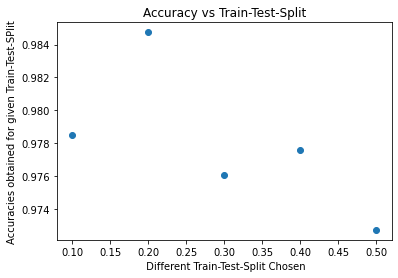

In [29]:

plt.scatter(z,acclist)
plt.xlabel(" Different Train-Test-Split Chosen")
plt.ylabel("Accuracies obtained for given Train-Test-SPlit")
plt.title("Accuracy vs Train-Test-Split")
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size =2*0.1 , random_state = 20+j)
model = MultinomialNB()
model.fit(train_x, train_y)
cm=confusion_matrix(test_y, model.predict(test_x))
print(cm)

[[944  14]
 [  7 150]]


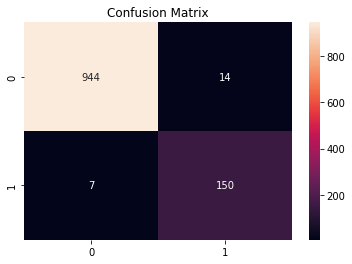

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.title('Confusion Matrix')
f = sns.heatmap(cm, annot=True, fmt='d')